### Import packages:

In [114]:
# Data manipulations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests:
import scipy.stats as stats

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [115]:
claims = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 3 - Insurance Claims Case Study\claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [116]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [117]:
cust_demographics = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust_demographics

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [118]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


### Combine the two datasets:

In [119]:
combined_data = pd.merge(left= claims, right= cust_demographics, how= 'left', left_on= 'customer_id', right_on= 'CUST_ID')
combined_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


In [120]:
combined_data = combined_data.loc[ : : , ['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent','gender', 'DateOfBirth', 'State', 'Contact',
       'Segment']]

In [121]:
combined_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,Male,13-May-77,NV,956-871-8691,Gold


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [122]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1085 non-null   object 
 11  DateOfBirth          1085 non-null   object 
 12  State                1085 non-null   object 
 13  Contact              1085 non-null   object 
 14  Segment              1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

### Following columns needs to have change in their datatypes:

             Columns                           Current data_type                    Converted data_type
    
    1. claim_date & DateofBirth                    object                               date & time
    
    2. claim amount                                object                                float
    
    3. claim_id & customer_id                      int 64                                object
    
    Note : claim_id & cutomer_id columns may or may not required data type conversion from int 64 to object.

In [123]:
# Convert claim_date & DateofBirth to datetime data type

In [124]:
combined_data['claim_date'] = pd.to_datetime(combined_data.claim_date, format= '%m/%d/%Y')

In [125]:
combined_data['DateOfBirth'] = pd.to_datetime(combined_data.DateOfBirth, format= '%d-%b-%y')

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [126]:
combined_data['claim_amount'] = combined_data['claim_amount'].str.replace('$', '').astype(float)

C:\Users\SHUBHAM SHARMA\AppData\Local\Temp\ipykernel_6972\375271875.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_data['claim_amount'] = combined_data['claim_amount'].str.replace('$', '').astype(float)


In [127]:
combined_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold


In [128]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [129]:
combined_data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver


In [130]:
combined_data.police_report.value_counts()

No         630
Unknown    300
Yes        170
Name: police_report, dtype: int64

In [131]:
combined_data['alert'] = np.where(combined_data.police_report == 'Yes', 1, 0)

In [132]:
combined_data

# where police report = No & Unknown, alert sign = 0
# where police report = Yes, alert sign = 1 

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,0
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [133]:
# Sort the data based on claim_date in descending order:

combined_data.sort_values('claim_date', ascending= False, inplace= True)

# Drop duplicates based on customer_id column, keeping only the first occurrence:

combined_data.drop_duplicates('customer_id', keep= 'first', inplace= True)


In [134]:
# checking uniqueness in customer_id column:

combined_data['customer_id'].is_unique

True

In [135]:
combined_data.customer_id.value_counts()

93915431    1
67722830    1
72664684    1
5264479     1
81371138    1
           ..
86818440    1
73898057    1
441097      1
68043300    1
75934330    1
Name: customer_id, Length: 1093, dtype: int64

#### this shows duplicate customers are removed now we have total 1093 records previously we have 1100 records which shows we have 7 such customers

In [136]:
combined_data.reset_index(inplace= True)

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [140]:
# checking for missing values:

combined_data.isnull().sum()

index                   0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert                   0
dtype: int64

In [141]:
# Impute missing values with mean for continuous variables:

continuous_vars = ['claim_amount', 'total_policy_claims']
for var in continuous_vars:
    mean_value = combined_data[var].mean()
    combined_data[var].fillna(mean_value, inplace=True)
    
# Impute missing values with mode for categorical variables
categorical_vars = ['gender', 'DateOfBirth', 'State', 'Contact', 'Segment']
for var in categorical_vars:
    mode_value = combined_data[var].mode()[0]
    combined_data[var].fillna(mode_value, inplace=True)

In [142]:
# checking for missing values after imputation:

combined_data.isnull().sum()

# so no missing values after imputation

index                  0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert                  0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the
      customers according to the below criteria
      Children < 18
      Youth 18-30
      Adult 30-60
      Senior > 60

In [153]:
combined_data.DateOfBirth.dt.year.value_counts()

# clearly till year 1969 is fine but for year less then 1969 we have to subtract 100 years to get correct year values 

1969    48
1993    34
1994    33
1980    33
1982    33
2067    32
1997    32
1984    31
1999    30
2060    30
2066    30
1971    30
2064    30
1988    29
1989    29
1987    28
1995    28
1976    28
2063    27
1996    27
2065    27
1970    27
1973    26
1985    26
2062    26
1975    26
1979    25
1977    25
2068    24
1998    24
1986    24
1978    23
1992    23
1991    23
1990    23
1974    23
1981    22
2061    19
1983    18
1972    17
Name: DateOfBirth, dtype: int64

In [158]:

combined_data.loc[combined_data['DateOfBirth'].dt.year % 100 < 69, 'DateOfBirth'] = combined_data.loc[combined_data
                            ['DateOfBirth'].dt.year % 100 < 69 , 'DateOfBirth'].apply(lambda x: x.replace(year=x.year - 100))


In [159]:
combined_data.DateOfBirth.dt.year.value_counts()

# now date of birth data is ready to go to calculate age of customers 

1969    48
1993    34
1994    33
1980    33
1982    33
1967    32
1997    32
1984    31
1999    30
1960    30
1966    30
1971    30
1964    30
1988    29
1989    29
1987    28
1995    28
1976    28
1963    27
1996    27
1965    27
1970    27
1973    26
1985    26
1962    26
1975    26
1979    25
1977    25
1968    24
1998    24
1986    24
1978    23
1992    23
1991    23
1990    23
1974    23
1981    22
1961    19
1983    18
1972    17
Name: DateOfBirth, dtype: int64

In [165]:
# age of customers in years:

combined_data['Cust_age'] = pd.Timestamp.now().year - combined_data.DateOfBirth.dt.year

In [178]:
print('min_age = ', combined_data.Cust_age.min())
print('max_age = ', combined_data.Cust_age.max())

# we have age of customers in between 24 to 63.

min_age =  24
max_age =  63


In [175]:
# categorize the age :

combined_data['age_category'] = pd.cut(combined_data.Cust_age, (0,18,30,60,70), labels= ['Children','Youth','Adult','Senior'])

# maximum age is 63 so for final group we can select any value greater than 63.

In [179]:
combined_data.age_category.value_counts()

Adult       810
Youth       208
Senior       75
Children      0
Name: age_category, dtype: int64

### 8. What is the average amount claimed by the customers from various segments?

In [186]:
pd.DataFrame(combined_data.groupby('Segment').claim_amount.mean())

,claim_amount
Segment,
Gold,12761.663185
Platinum,12370.565077
Silver,12265.736955


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [190]:
# Filter the data for claims done at least 20 days prior to October 1, 2018:

filtered_data = combined_data[combined_data.claim_date <= pd.to_datetime('2018-09-11')]

In [193]:
pd.DataFrame(filtered_data.groupby('incident_cause').claim_amount.sum())

,claim_amount
incident_cause,
Crime,7.269595e+05
Driver error,3.344546e+06
Natural causes,1.315301e+06
Other causes,3.778023e+06
Other driver error,3.342803e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [234]:
summ1 = combined_data[(combined_data.age_category == 'Adult') & (combined_data['incident_cause'].isin
                                  (['Driver error','Other driver error'])) & (combined_data['State'].isin(['TX', 'DE', 'AK']))]
summ1.head()

,index,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert,Cust_age,age_category
5,318,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12475.499514,2.0,No,Female,1986-03-18,AK,436-934-7156,Silver,0,37,Adult
67,372,92399694,92971195,Other driver error,2018-09-26,Home,No,Material only,1140.000000,1.0,No,Male,1975-02-02,DE,892-173-4657,Gold,0,48,Adult
75,114,65335959,61810954,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,Male,1969-05-18,TX,724-493-6179,Silver,0,54,Adult
114,183,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,Male,1989-11-10,TX,562-259-5432,Silver,0,34,Adult
169,242,7238381,684748,Other driver error,2018-07-14,Auto,No,Material only,2920.000000,2.0,No,Male,1977-08-03,AK,613-385-2863,Gold,0,46,Adult


In [235]:
pd.DataFrame(summ1.State.value_counts())

,State
DE,10
TX,9
AK,8


In [236]:
print('Total customers from these 3 states = ', summ1.State.value_counts().sum())

Total customers from these 3 states =  27


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [221]:
summ2 = combined_data.groupby('gender').claim_amount.sum()

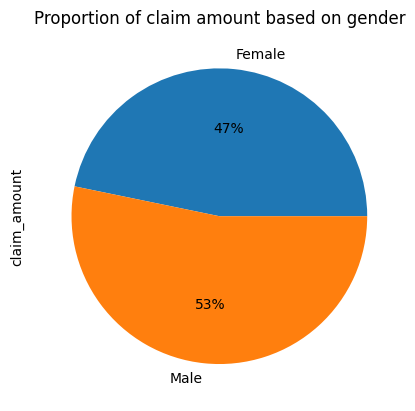

In [297]:
summ2.plot(kind= 'pie', autopct = '%1.0f%%')
plt.title('Proportion of claim amount based on gender')
plt.show()

In [225]:
summ3 = combined_data.groupby('Segment').claim_amount.sum()

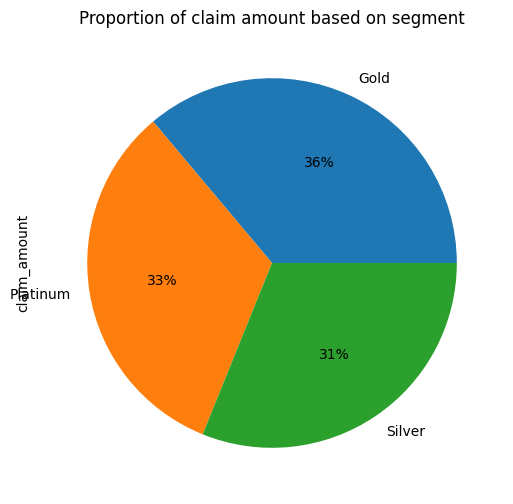

In [301]:
plt.figure(figsize= (6,6))
summ3.plot(kind = 'pie', autopct = '%1.0f%%')
plt.title('Proportion of claim amount based on segment')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [231]:
combined_data.incident_cause.value_counts()

Other causes          289
Driver error          260
Other driver error    247
Natural causes        188
Crime                 109
Name: incident_cause, dtype: int64

In [251]:
summ4 = combined_data[ combined_data['incident_cause'].isin(['Driver error','Other driver error']) ]

In [252]:
summ4 = summ4.loc[ : :, ['gender', 'claim_amount']]

In [258]:
summ4

gender
Female    3.136377e+06
Male      4.069583e+06
Name: claim_amount, dtype: float64

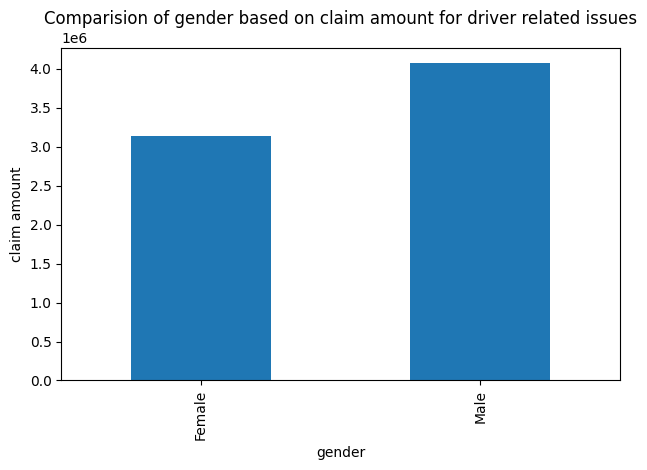

In [296]:
summ4.plot(kind = 'bar')
plt.ylabel('claim amount')
plt.title('Comparision of gender based on claim amount for driver related issues')
plt.tight_layout()
plt.show()

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [268]:
summ5 = combined_data[combined_data.fraudulent == 'Yes']

In [273]:
summ6 = summ5.groupby('age_category').fraudulent.count()
summ6

age_category
Children      0
Youth        39
Adult       192
Senior       21
Name: fraudulent, dtype: int64

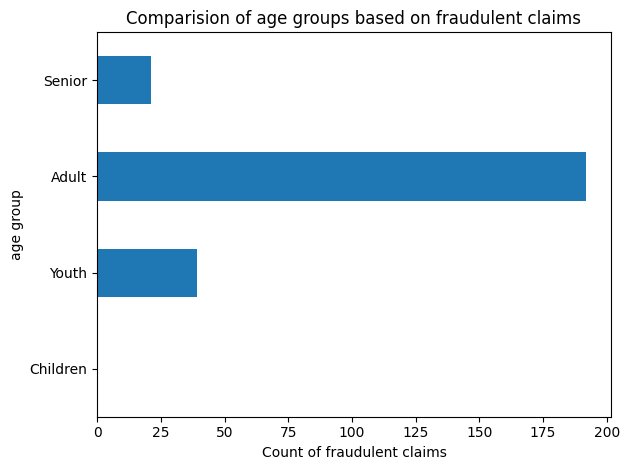

In [295]:
summ6.plot(kind = 'barh')
plt.ylabel('age group')
plt.xlabel('Count of fraudulent claims')
plt.title('Comparision of age groups based on fraudulent claims')
plt.tight_layout()
plt.show()

### Age group of adults (30-60) has the highest fraudulent claims.

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [285]:
# Group the data by month and calculate the total amount claimed for each month:

monthly_total = combined_data.groupby(combined_data['claim_date'].dt.month)['claim_amount'].sum()

# Create a list of month names:

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


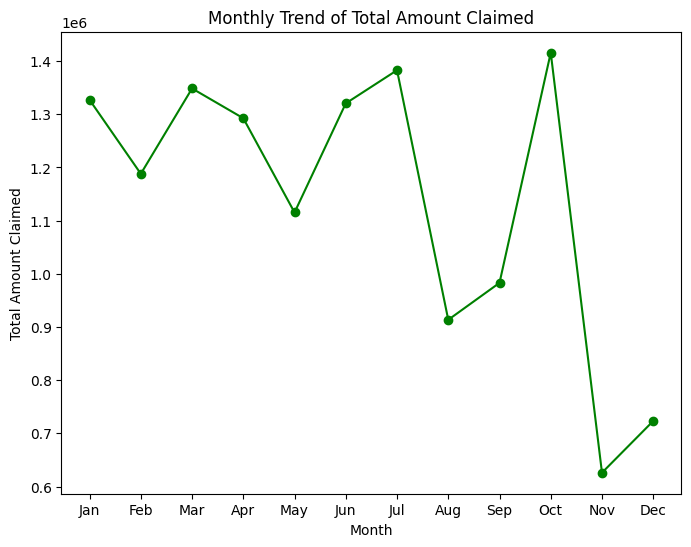

In [302]:
# Plotting the monthly trend:

plt.figure(figsize= (8,6))
monthly_total.plot(marker='o', color='green', xticks=monthly_total.index)
plt.xlabel('Month')
plt.ylabel('Total Amount Claimed')
plt.title('Monthly Trend of Total Amount Claimed')
plt.xticks(monthly_total.index, month_names)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a sacetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [304]:
summ7 = combined_data.groupby(['gender', 'age_category', 'fraudulent'])['claim_amount'].mean().reset_index()
summ7

,gender,age_category,fraudulent,claim_amount
0,Female,Children,No,NaN
1,Female,Children,Yes,NaN
2,Female,Youth,No,13172.932069
3,Female,Youth,Yes,9215.499907
4,Female,Adult,No,11982.134667
5,Female,Adult,Yes,12628.384583
6,Female,Senior,No,14958.874878
7,Female,Senior,Yes,3779.076923
8,Male,Children,No,NaN
9,Male,Children,Yes,NaN


<Figure size 1200x600 with 0 Axes>

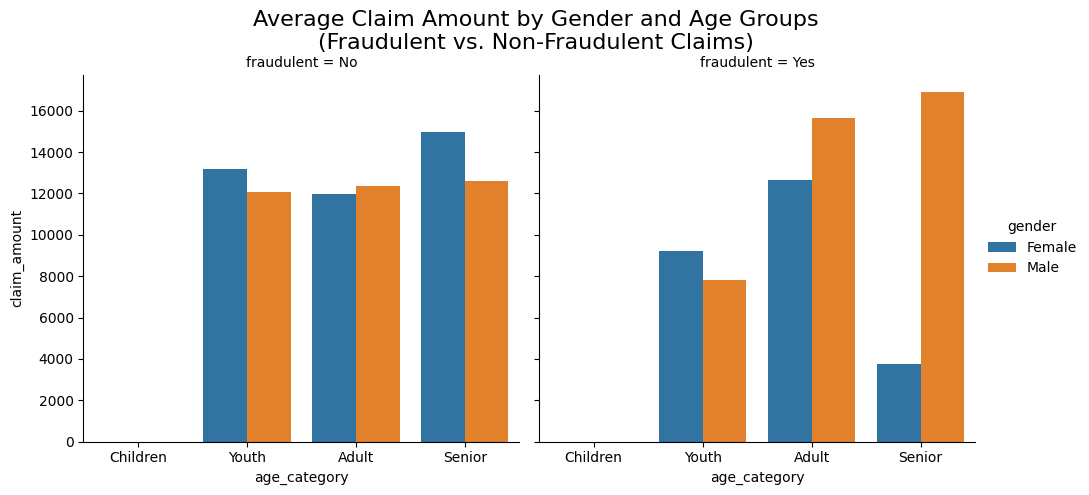

In [313]:
# Plotting the scaetted bar chart:

plt.figure(figsize=(12, 6))
sns.catplot(data=summ7, x='age_category', y='claim_amount', hue='gender', col='fraudulent', kind='bar', errorbar=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Average Claim Amount by Gender and Age Groups\n(Fraudulent vs. Non-Fraudulent Claims)', fontsize=16)
plt.show()

## Hypothesis testing: 

### 16. Is there any similarity in the amount claimed by males and females?

In [ ]:
##### 1. Define Null Hypothesis, H0:
            mean amount claimed by male =! mean amount claimed by females
            u1 =! u2
             
##### 2. Define Alternate Hypothesis, Ha:
            
            mean amount claimed by male = mean amount claimed by females
            u1 = u2
            
##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test

In [323]:
male_amount_claimed = combined_data.loc[combined_data.gender == 'Male', 'claim_amount']
male_amount_claimed.mean()

12825.38866164359

In [325]:
female_amount_claimed = combined_data.loc[combined_data.gender == 'Female', 'claim_amount']
female_amount_claimed.mean()

12099.717240787364

In [326]:
#### test:

stats.ttest_ind(male_amount_claimed, female_amount_claimed)

Ttest_indResult(statistic=0.897746972800219, pvalue=0.3695185282320991)

#### 5. Rejection reule:

       p value obtaind in above output(0.3695185282320991) > 0.05
       we didn't reject H0!!

#### Business conclusions:

     Based on the given data set there was no similarity in the amount claimed by males and females

### 17. Is there any relationship between age category and segment?

In [ ]:
##### 1. Define Null Hypothesis, H0:
            
            Age category and segment are independent on each other 

##### 2. Define Alternate Hypothesis, Ha:
            
            Age category and segment are dependent on each other 

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            Chi-Square 

In [327]:
### creating cross_tab

obs = pd.crosstab(index= combined_data.age_category , columns= combined_data.Segment)
obs

Segment,Gold,Platinum,Silver
age_category,,,
Youth,71,69,68
Adult,287,266,257
Senior,28,26,21


In [328]:
stats.chi2_contingency(obs)

(0.6313174395846601,
 0.959520832456615,
 4,
 array([[ 73.45654163,  68.6989936 ,  65.84446478],
        [286.05672461, 267.52973468, 256.41354071],
        [ 26.48673376,  24.77127173,  23.74199451]]))

#### 5. Rejection rule:
     
           As it is clear from above output, observed and expected frequency table values are very close to each other ,
           so age_category and segment are not dependent on each other. Hence didn't reject H0!!
            
                                                   OR
                                                   
           New p value (0.959520832456615) > 0.05, so didn't reject H0!!
                                       

#### 6. Business conclusion:

                Age_category and segment are not dependent on each other 

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### we have the data for year 2017-18. current year = 2017-18, given mean = 10,000 for year 2016-2017

##### 1. Define Null Hypothesis, H0:
            
            u <= 10,000

##### 2. Define Alternate Hypothesis, Ha:
            
            u > 10,000

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            t-test 

In [334]:
combined_data.claim_amount.mean()

12475.499513618675

In [335]:
stats.ttest_1samp(combined_data.claim_amount, 10000)

Ttest_1sampResult(statistic=6.1294570291875985, pvalue=1.2298028517276338e-09)

#### 5. Rejection rule

         As the new p value in above output(1.2298028517276338e-09) < 0.05,
         we reject H0!!

####  6.Businss conclusion:

           The current year has shown a rise in claim amounts as compared to 2016-17

### 19. Is there any difference between age groups and insurance claims?

In [336]:
combined_data.age_category.value_counts()

Adult       810
Youth       208
Senior       75
Children      0
Name: age_category, dtype: int64

####      we don't have any records having age group lie in children category,
    so, u1 = mean amount claimed by adults
        u2 = mean amount claimed by youths
        u3 = mean amount claimed by seniors

##### 1. Define Null Hypothesis, H0:
            
            u1 = u2 = u3 
                 OR
            different age groups have same mean of claim amount 

##### 2. Define Alternate Hypothesis, Ha:
            
              u1 != u2 != u3 
                 OR
            different age groups have different mean of claim amount

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            F-Test or ANOVA 

In [338]:
adult = combined_data.loc[combined_data.age_category == 'Adult', 'claim_amount']

In [339]:
youth = combined_data.loc[combined_data.age_category == 'Youth', 'claim_amount']

In [342]:
senior = combined_data.loc[combined_data.age_category == 'Senior', 'claim_amount']

In [346]:
print('Mean amount claimed by adult :', adult.mean())
print('Mean amount claimed by youth :', youth.mean())
print('Mean amount claimed by senoir :', senior.mean())

# mean values of all age groups are very close to each other 

Mean amount claimed by adult : 12654.0036790844
Mean amount claimed by youth : 11849.14900104759
Mean amount claimed by senoir : 12284.733281452658


In [344]:
# perform the test:

stats.f_oneway(adult, youth, senior)

F_onewayResult(statistic=0.3085069265056167, pvalue=0.7346069817190959)

#### 5.Rejection Rule:

             From above output p value (0.7346069817190959) > 0.05
             Hence, Didn't reject H0!!

#### 6.Business Conclusion:
                  
                  Different age groups of customers may or may not have same card usage 

### 20. Is there any relationship between total number of policy claims and the claimed amount?

##### 1. Define Null Hypothesis, H0:
            
            total number of policy claimed and claimed amount are NOT related

##### 2. Define Alternate Hypothesis, Ha:
            
            total number of policy claimed and claimed amount are related

##### 3. Define CI & p value:
            
    CI = 95%
    p values = 0.05
    
##### 4. Perform the test:
            
            pearsonr

In [350]:
stats.pearsonr(combined_data.total_policy_claims, combined_data.claim_amount)

PearsonRResult(statistic=-0.023908971978697444, pvalue=0.42973091875449343)

##### 5. Rejection Rule:
            
            From the above output, the pearson co-efficeint value = -0.023908971978697444, which is very low, so no relation. 
            Hence, we didn't REJECT H0!!!!
            
                            OR
                            
             The new p value (0.42973091875449343) from the output > assumed p value( 0.05)
             Hence, we didn't REJECT H0!!!!

##### 6. Business Conclusion:
                
             There is no relation between the total number of policy claimed and claimed amount.

<AxesSubplot: xlabel='total_policy_claims', ylabel='claim_amount'>

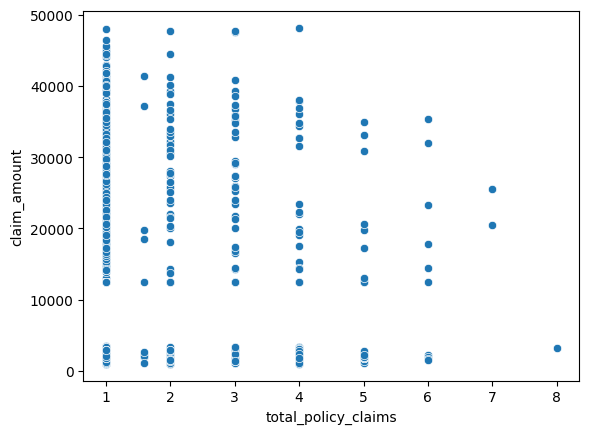

In [352]:
sns.scatterplot( x = 'total_policy_claims', y = 'claim_amount', data = combined_data)

### Also, the scatter plot between total policy claimed and claim amount did not show any kind of direct or indirect relationship between them.